In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pycountry as pc

In [3]:
df = pd.read_csv("prepared_data_2.csv", encoding="utf-8", index_col=0)

In [4]:
df = df.rename(columns={"Longtitude" : "Longitude"})

# Map plots

Heatmaps, scatterplots, Choropleth 

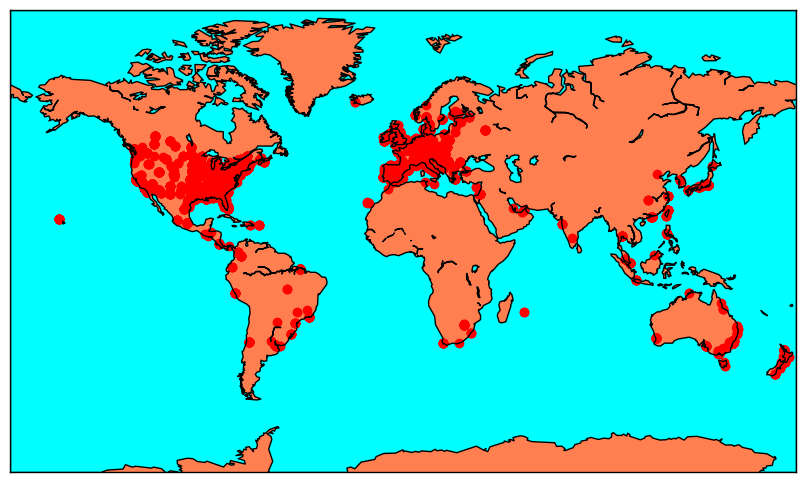

In [5]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

map.scatter(df["Longitude"], df["Latitude"], latlon=True, color='red')
plt.show()

In [6]:
df_cities = pd.DataFrame(df["City"].value_counts())
df_cities = df_cities.join(df.set_index('City')[["Latitude", "Longitude"]], how="left").drop_duplicates()

In [7]:
df_cities

,count,Latitude,Longitude
City,,,
Aarhus,1,56.149628,10.213405
Aberdeen,2,57.148243,-2.092809
Abu Dhabi,2,24.453835,54.377401
Adelaide,27,-34.928181,138.599931
Alajuela,1,10.452332,-84.466328
...,...,...,...
Zaragoza,3,41.652134,-0.880943
Zeltweg,1,47.191204,14.754924
Zurich,6,47.374449,8.541042


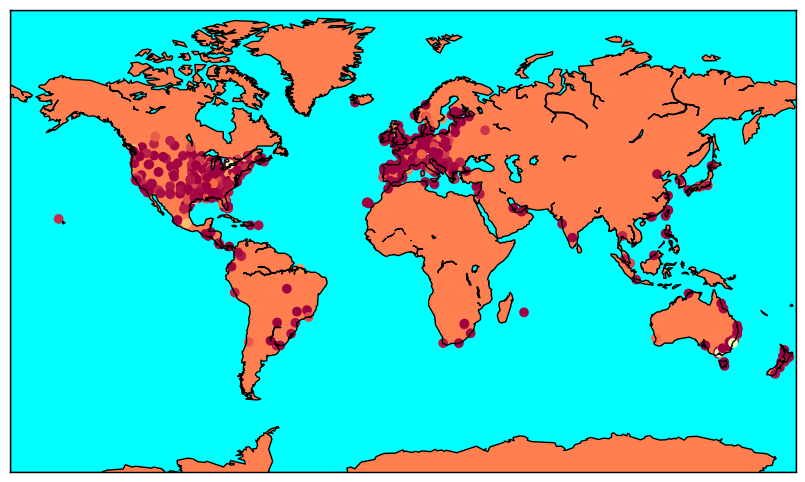

In [8]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

map.scatter(df_cities["Longitude"], df_cities["Latitude"], 
            c = df_cities["count"], cmap = "Spectral",
            latlon=True, )
plt.show()

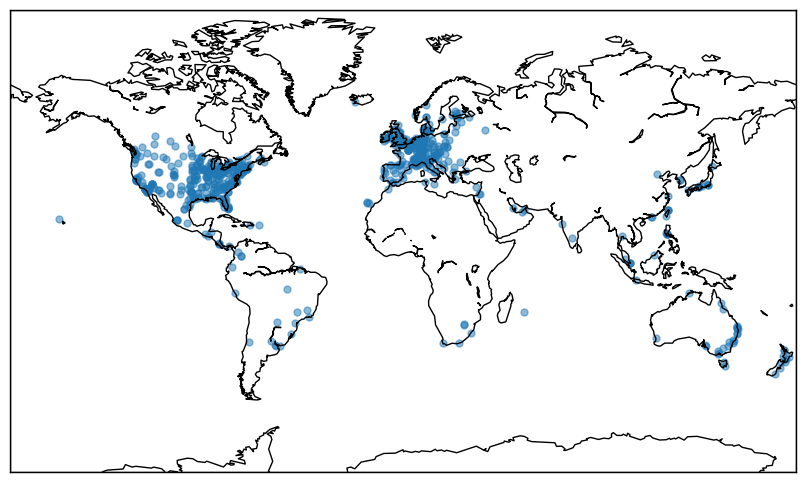

In [9]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)

map.drawmapboundary()
map.drawcoastlines()

map.scatter(df_cities["Longitude"], df_cities["Latitude"], 
            alpha = 0.5, s = 25,
            latlon=True, )
plt.show()

In [10]:
def normalize(x, min_val, max_val):
    return (x-min_val)/(max_val-min_val)
df_cities = df_cities.sort_values("count")
df_cities["Alpha"] = df_cities["count"] / sum(df_cities["count"])
df_cities["Alpha"] = df_cities["Alpha"].apply(normalize, 
                                              args=(df_cities["Alpha"].min(), df_cities["Alpha"].max()))

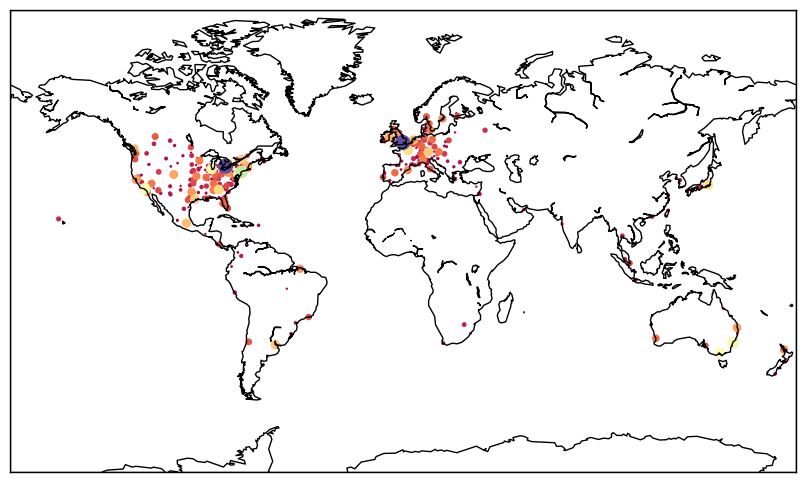

In [11]:
plt.figure(figsize=(12,6))

map = Basemap( projection="mill",
              llcrnrlat=-75, llcrnrlon=-180,
              urcrnrlat=85, urcrnrlon=180,
              lat_0=0, lon_0=0)

map.drawmapboundary()
map.drawcoastlines()

map.scatter(df_cities["Longitude"], df_cities["Latitude"], 
            c = df_cities["count"], cmap = "Spectral", 
            s=df_cities["Alpha"]*100, latlon=True, )

# Statistics

Top values, artist by continents numbers by continents

In [12]:
df["Country"].value_counts().head(10)

Country
United States    3585
Canada            428
Germany           421
Australia         398
England           388
France            220
Japan             156
Italy             149
Netherlands       147
Spain             138
Name: count, dtype: int64

In [13]:
df["City"].value_counts().head(10)

City
London             219
New York City      144
Toronto            121
Sydney             120
Los Angeles        117
Philadelphia       117
East Rutherford    109
Melbourne          108
Chicago            103
Tokyo               89
Name: count, dtype: int64